In [108]:
import itertools 
import copy

import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from pandas.tseries.offsets import *
import statsmodels.api as sm
from datetime import datetime

import trend_detection

df = []

df.append(pd.read_csv("Images_Russia.csv", sep=";",index_col="Datetime"))
df.append(pd.read_csv("Weather_Russia.csv", sep=";",index_col="Datetime"))

df[0].shape, df[0][:2]

((186, 2),             Monthly  Average daily
 Datetime                          
 2008-05-01  6608910         717430
 2008-06-01  6362910         679620)

In [109]:
for i in xrange(len(df)):
    df[i] = df[i][[0]].copy()
    df[i].drop_duplicates(inplace=True)
    print df[i].shape, df[i][:1]    

(93, 1)             Monthly
Datetime           
2008-05-01  6608910
(93, 1)             Monthly
Datetime           
2008-05-01  4510200


<IPython.core.display.Javascript object>


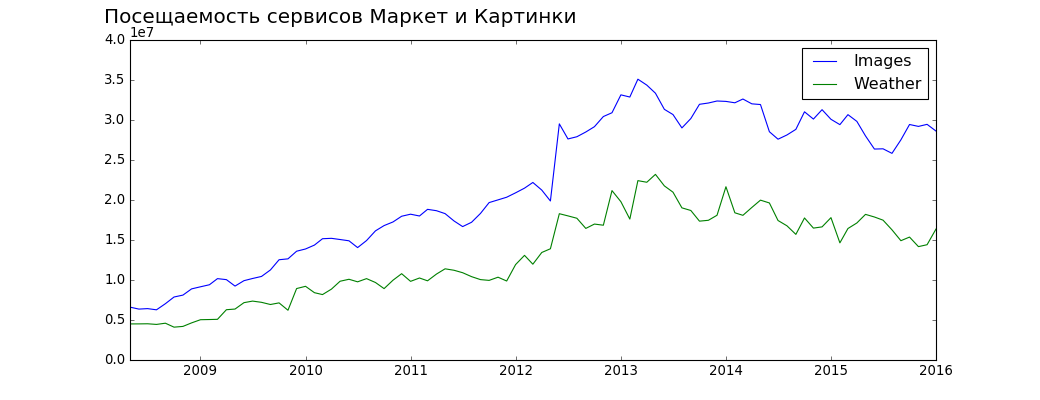

In [110]:
date_ranges = [] 

for i in xrange(len(df)):
    date_ranges.append(pd.date_range(df[i].index.tolist()[0], df[i].index.tolist()[-1], freq='MS'))    
    
for i in xrange(len(df)):
    df[i].index = date_ranges[i]
    
f = plt.figure(figsize=(13, 5), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)

plt.suptitle(u'Посещаемость сервисов Маркет и Картинки', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=18)
img, = plt.plot(df[0], label='Images')
wtr, = plt.plot(df[1], label='Weather')
plt.legend(handles=[img, wtr])

In [111]:
date_ranges[i][21-12] == date_ranges[i][21]  - DateOffset(months=12)

True

In [112]:
df[0].index.tolist()[21-12] == date_ranges[i][21]  - DateOffset(months=12)

True

In [113]:
next_months = []

for i in xrange(len(df)):
    next_months.append([])
    next_months[i].extend(itertools.repeat(np.nan, 12))    
    for j in list(xrange(date_ranges[i].shape[0]))[12:]:
        next_months[i].append(df[i].iloc[j-12]['Monthly']) 
    df[i]['Prev-year'] = next_months[i]
    
df[0][:13]

,Monthly,Prev-year
2008-05-01,6608910,NaN
2008-06-01,6362910,NaN
2008-07-01,6423440,NaN
2008-08-01,6273210,NaN
2008-09-01,7038170,NaN
2008-10-01,7873560,NaN
2008-11-01,8112760,NaN
2008-12-01,8888870,NaN
2009-01-01,9151460,NaN
2009-02-01,9405490,NaN


In [114]:
# previous_months=[]
# for i in xrange(len(df)):
#     previous_months.append([])
#     for j in xrange(date_ranges[i].shape[0]):
#         previous_months[i].append(date_ranges[i][j] - DateOffset(months=12))

for i in xrange(len(df)):
    prev = df[i]['Monthly'].tolist()[:-1]
    prev.insert(0,np.nan)
    df[i]["Previous"] = prev

diffs = []

for i in xrange(len(df)):              
    df[i]["Current-Previous-Diff"]=df[i]['Monthly'] - df[i]['Previous']
    df[i]["Current-Previous-%"]=df[i]['Monthly'] / df[i]['Previous']
    df[i]["Current-Prev-Year-Diff"]=df[i]['Monthly'] - df[i]['Prev-year']
    df[i]["Current-Prev-Year-%"]=df[i]['Monthly'] / df[i]['Prev-year']
    

print df[0][:13]

             Monthly  Prev-year  Previous  Current-Previous-Diff  \
2008-05-01   6608910        NaN       NaN                    NaN   
2008-06-01   6362910        NaN   6608910                -246000   
2008-07-01   6423440        NaN   6362910                  60530   
2008-08-01   6273210        NaN   6423440                -150230   
2008-09-01   7038170        NaN   6273210                 764960   
2008-10-01   7873560        NaN   7038170                 835390   
2008-11-01   8112760        NaN   7873560                 239200   
2008-12-01   8888870        NaN   8112760                 776110   
2009-01-01   9151460        NaN   8888870                 262590   
2009-02-01   9405490        NaN   9151460                 254030   
2009-03-01  10170730        NaN   9405490                 765240   
2009-04-01  10045830        NaN  10170730                -124900   
2009-05-01   9239910    6608910  10045830                -805920   

            Current-Previous-%  Current-Prev-Ye

# Заполним пустые значения для синхронизации дат графиков
т.к непонятно как работают функции связанные с этим в matplotlib

In [115]:
for i in xrange(len(df)):
    df[i].fillna(method='backfill',inplace=True)
df[i][:13]

,Monthly,Prev-year,Previous,Current-Previous-Diff,Current-Previous-%,Current-Prev-Year-Diff,Current-Prev-Year-%
2008-05-01,4510200,4510200,4510200,3360,1.000745,1858580,1.412084
2008-06-01,4513560,4510200,4510200,3360,1.000745,1858580,1.412084
2008-07-01,4528320,4510200,4513560,14760,1.003270,1858580,1.412084
2008-08-01,4447400,4510200,4528320,-80920,0.982130,1858580,1.412084
2008-09-01,4599410,4510200,4447400,152010,1.034180,1858580,1.412084
2008-10-01,4105490,4510200,4599410,-493920,0.892612,1858580,1.412084
2008-11-01,4199800,4510200,4105490,94310,1.022972,1858580,1.412084
2008-12-01,4639740,4510200,4199800,439940,1.104753,1858580,1.412084
2009-01-01,5036520,4510200,4639740,396780,1.085518,1858580,1.412084
2009-02-01,5059180,4510200,5036520,22660,1.004499,1858580,1.412084


# Добавим фичей связанных с особенностями данных
т.к за основу взяты данные из TNS, и там было 2 обновления выборки в процессе, возможно это пригодится в дальнейшем

In [116]:
def fill_data(ix, date):            
    if ix<date:
        return 0
    else:
        return 1  

for i in xrange(len(df)):
    df[i]['less-100k'] = df[i].index.map(lambda ix: fill_data(ix, datetime(2012,6,1)))
    df[i]['55-64'] = df[i].index.map(lambda ix: fill_data(ix, datetime(2012,9,1)))


print df[i][:2]
print df[i][-2:]


            Monthly  Prev-year  Previous  Current-Previous-Diff  \
2008-05-01  4510200    4510200   4510200                   3360   
2008-06-01  4513560    4510200   4510200                   3360   

            Current-Previous-%  Current-Prev-Year-Diff  Current-Prev-Year-%  \
2008-05-01            1.000745                 1858580             1.412084   
2008-06-01            1.000745                 1858580             1.412084   

            less-100k  55-64  
2008-05-01          0      0  
2008-06-01          0      0  
             Monthly  Prev-year  Previous  Current-Previous-Diff  \
2015-12-01  14409400   16639520  14171330                 238070   
2016-01-01  16368180   17794190  14409400                1958780   

            Current-Previous-%  Current-Prev-Year-Diff  Current-Prev-Year-%  \
2015-12-01            1.016799                -2230120             0.865974   
2016-01-01            1.135938                -1426010             0.919861   

            less-100k  5

<IPython.core.display.Javascript object>


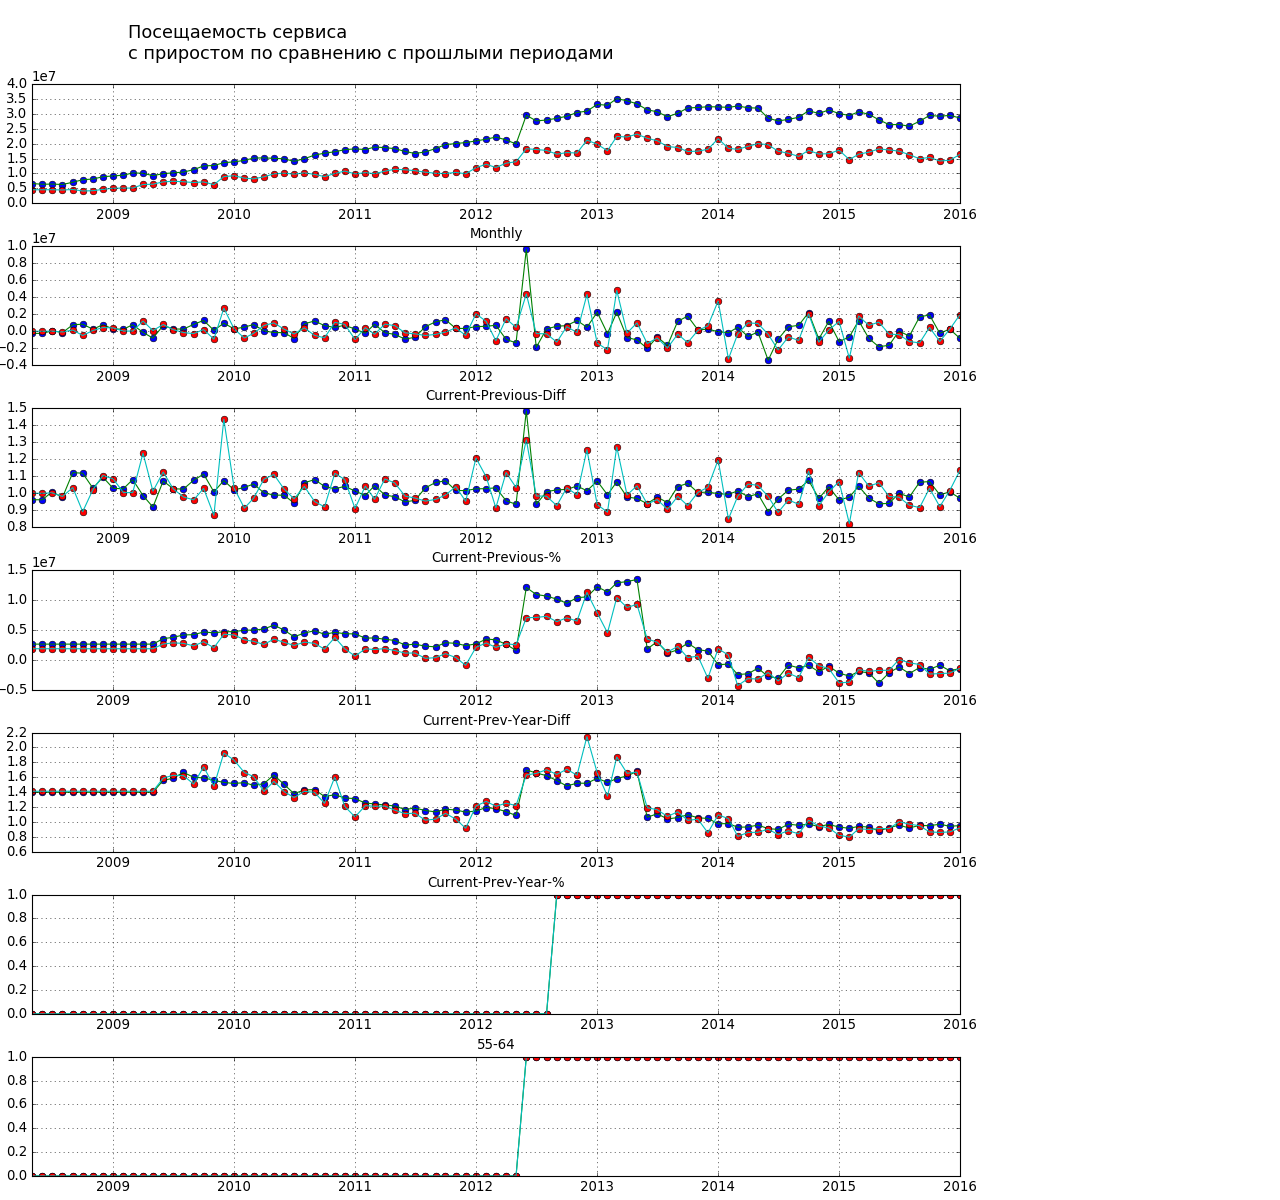

In [121]:
f = plt.figure(figsize=(16, 15), dpi=80)

graphs = [  'Monthly', 
            'Current-Previous-Diff', 
            'Current-Previous-%', 
            'Current-Prev-Year-Diff', 
            'Current-Prev-Year-%',
            '55-64', 
            'less-100k']

grid = matplotlib.gridspec.GridSpec(len(graphs),1)

plt.suptitle(u'Посещаемость сервиса \nс приростом по сравнению с прошлыми периодами\n', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=16)

for i in xrange(len(graphs)):    
    for j in xrange(len(df)):        
        ax = plt.subplot(grid[i, 0])             
        ax.plot(df[0].index.tolist(), df[j][graphs[i]],linestyle='none', marker='o')
        ax.grid(True)
        ax.set_xlabel(graphs[i])     
        ax = plt.subplot(grid[i, 0])             
        ax.plot(df[0].index.tolist(), df[j][graphs[i]])                
        
        
# настроим отступы у графика 

#plt.subplot_tool()

# применим настройки 

plt.subplots_adjust(left=0.025, bottom=0.02, right=0.75, top=0.93, wspace=0.27, hspace=0.36)


По графику заметно, что добавление новых данных привело к заметному выбросу в данных.

Можно сделать вывод, что для увеличения точности прогноза нужно 

<IPython.core.display.Javascript object>


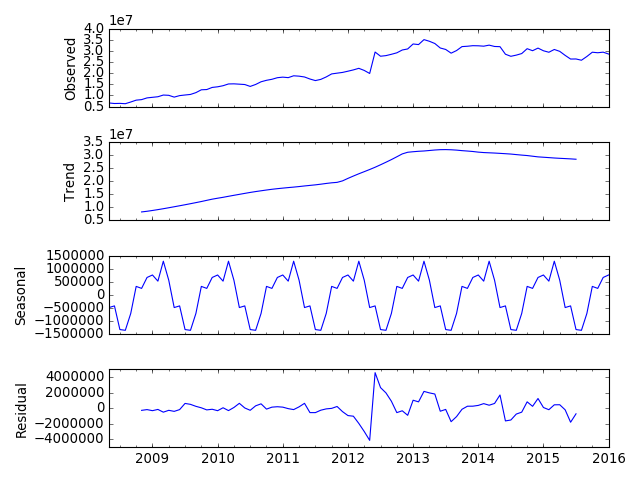

<IPython.core.display.Javascript object>


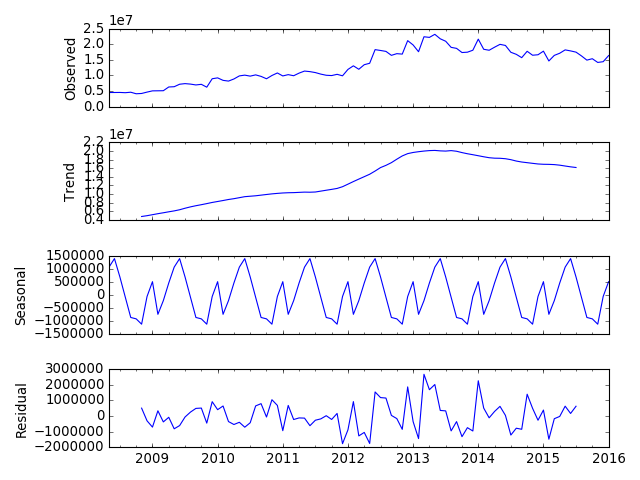

In [91]:
for i in xrange(len(df)):
    res = sm.tsa.seasonal_decompose(df[i][['Monthly']], model='additive')
    res.plot()

In [ ]:


decomposition = seasonal_decompose(stock_data['Natural Log'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()  

res = sm.tsa.ARMA(dta, (3, 0)).fit()

In [ ]:
f = plt.figure(figsize=(23, 10), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)


plt.suptitle(u'Посещаемость Погоды', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=36)
plt.plot(df2)


In [ ]:
dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()